### Import libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

### Some information about the dataset

- **Sex**: Represents the sex of the abalone (M - Male, F - Female, I - Infant or Immature, this category is used to denote abalones that are too young to be accurately classified as male or female)
- **Length**: Indicates the length of the abalone.
- **Diameter**: Indicates the diameter of the abalone.
- **Height**: Indicates the height of the abalone.
- **Whole weight**: Represents the whole weight of the abalone.
- **Shucked weight**: Represents the shucked weight of the abalone.
- **Viscera weight**: Represents the viscera weight of the abalone.
- **Shell weight**: Represents the shell weight of the abalone.
- **Rings**: Indicates the number of rings on the abalone, which can be used to estimate its age.

In [3]:
df_train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
df_train.shape

(90615, 9)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [6]:
df = df_train.copy()

## EDA

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [8]:
df.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,NaN,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,NaN,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000


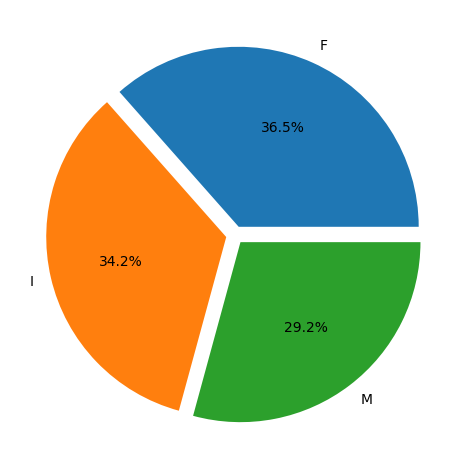

In [9]:
plt.pie(x = df['Sex'].value_counts(), labels = df['Sex'].unique(), autopct='%1.1f%%', explode=[0.05,0.05,0.05])
plt.tight_layout()
plt.show()

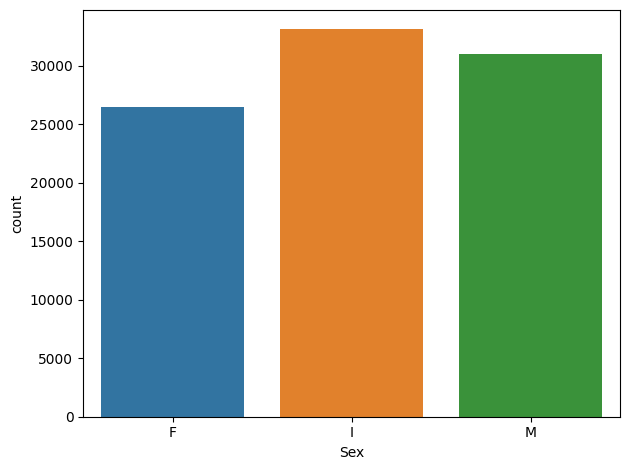

In [10]:
sns.countplot(data = df, x = 'Sex')
plt.tight_layout()


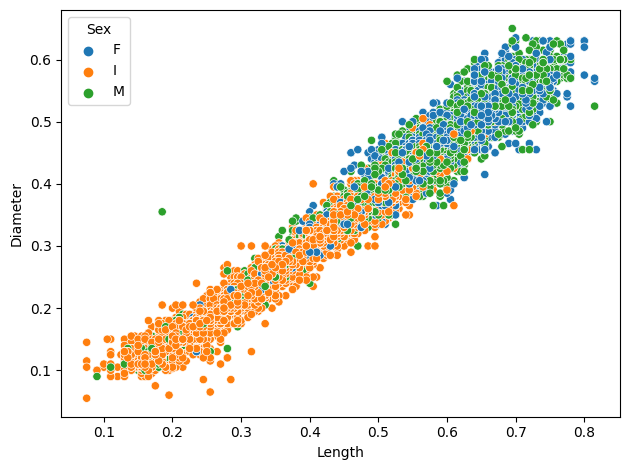

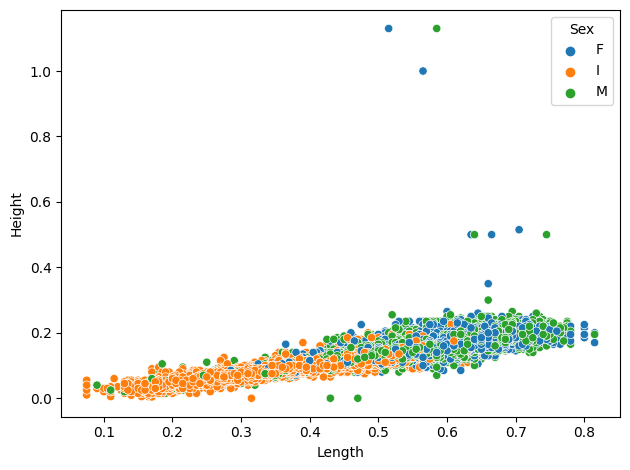

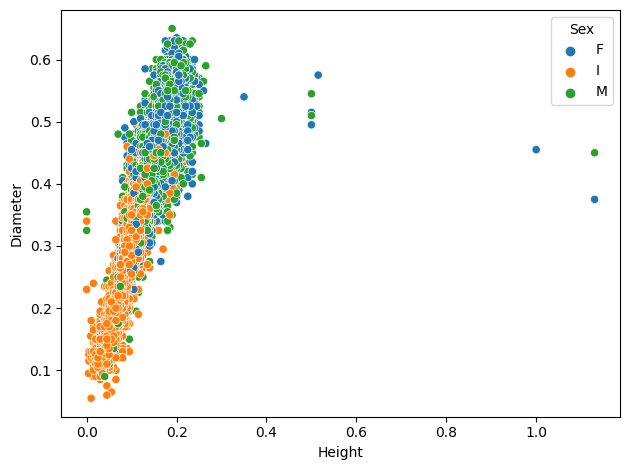

In [11]:
sns.scatterplot(data = df, x = 'Length', y = 'Diameter', hue='Sex')
plt.tight_layout()
plt.show()
sns.scatterplot(data = df, x = 'Length', y = 'Height', hue='Sex')
plt.tight_layout()
plt.show()
sns.scatterplot(data = df, x = 'Height', y = 'Diameter', hue='Sex')
plt.tight_layout()
plt.show()

In [12]:
numerical_cols = df.drop(columns = 'Rings').select_dtypes(exclude = 'object').columns
categorical_cols = df.select_dtypes(include = 'object').columns

print(numerical_cols)
print(categorical_cols)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')
Index(['Sex'], dtype='object')


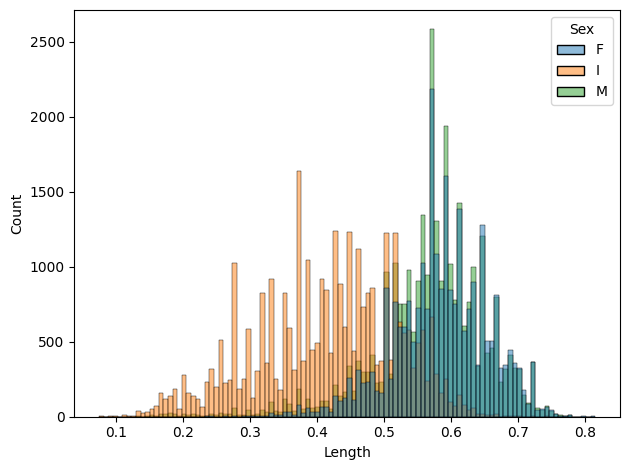

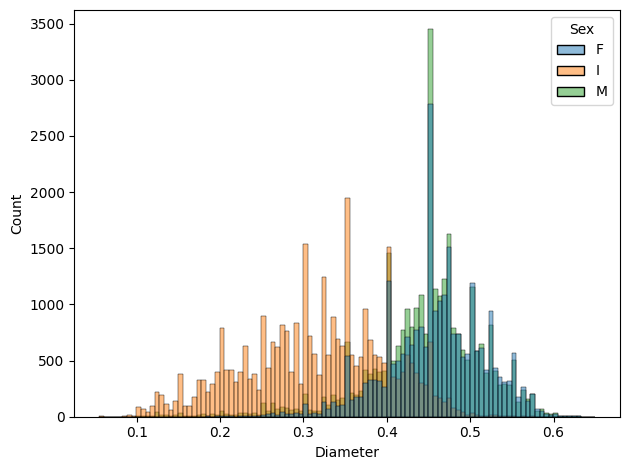

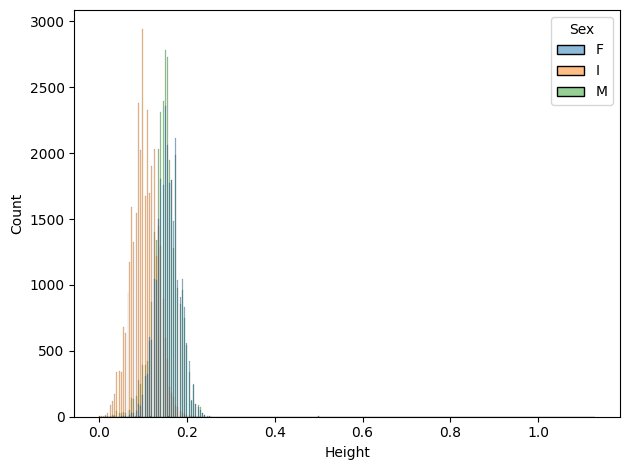

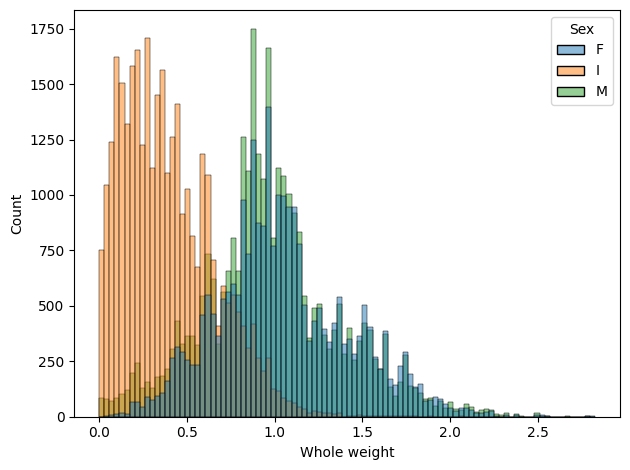

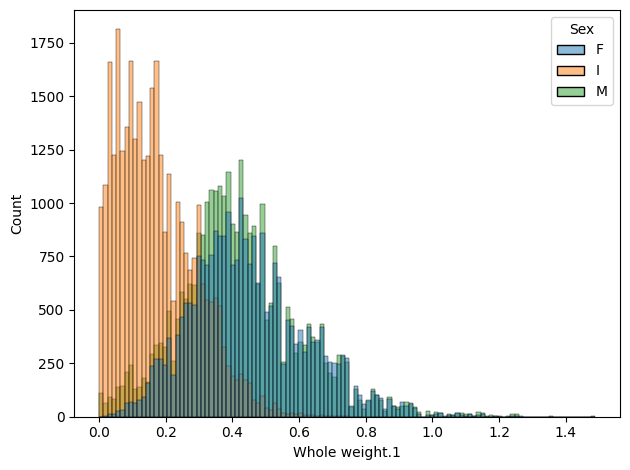

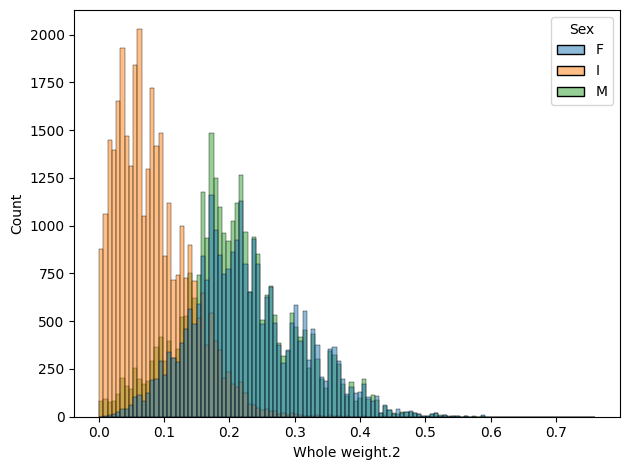

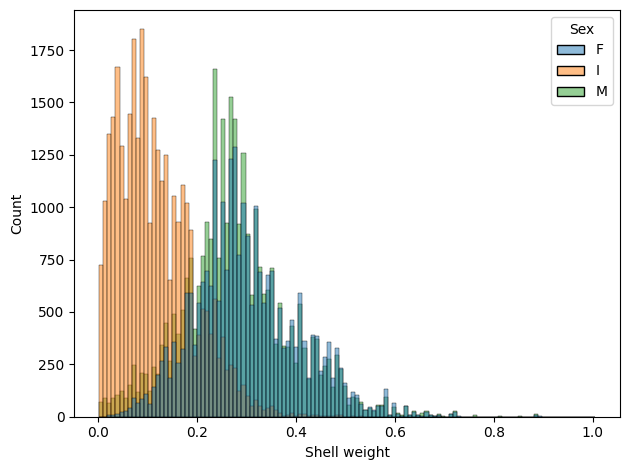

In [13]:
for col in numerical_cols:
    sns.histplot(data = df, x = col, hue = 'Sex')
    plt.tight_layout()
    plt.show()

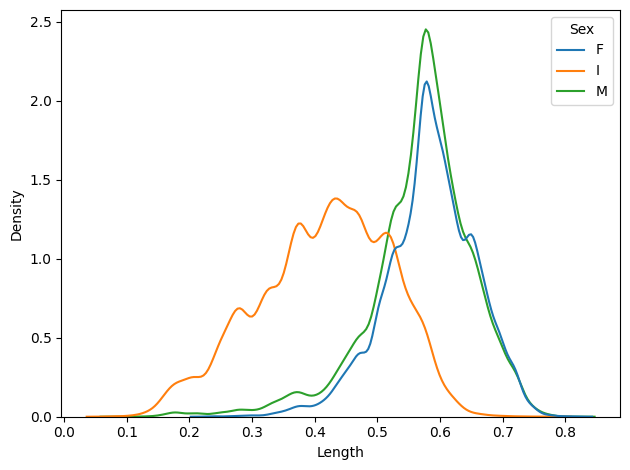

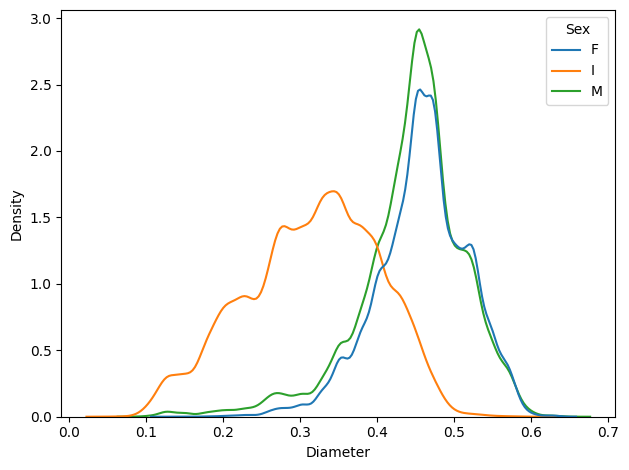

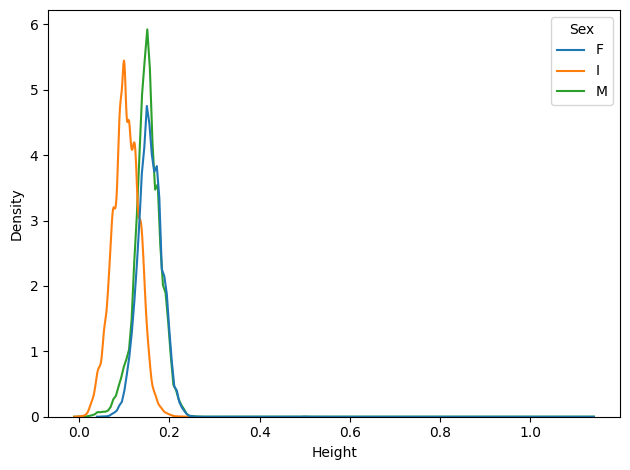

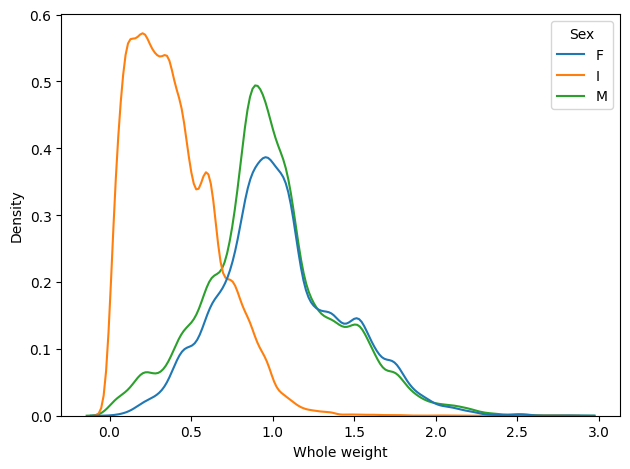

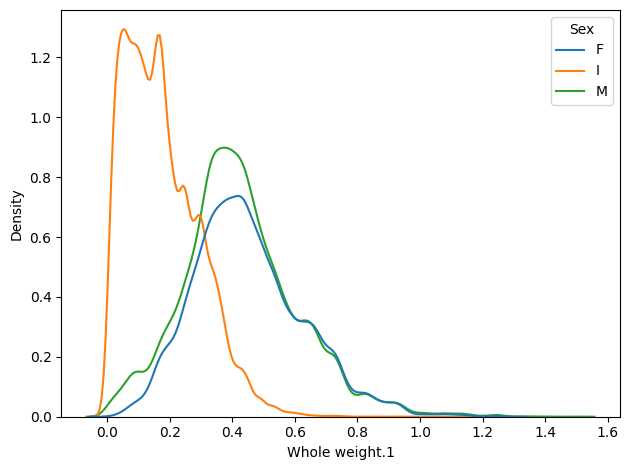

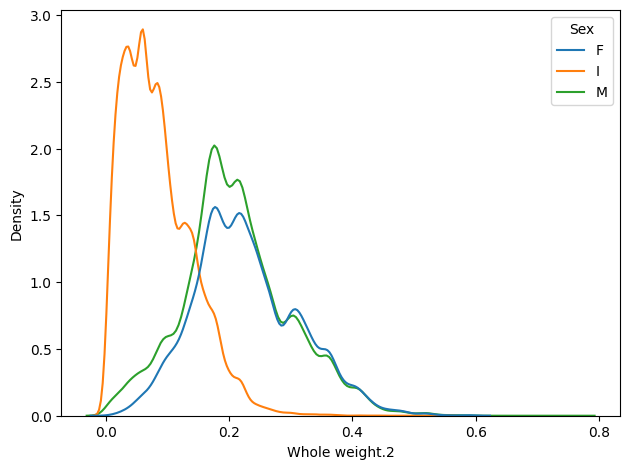

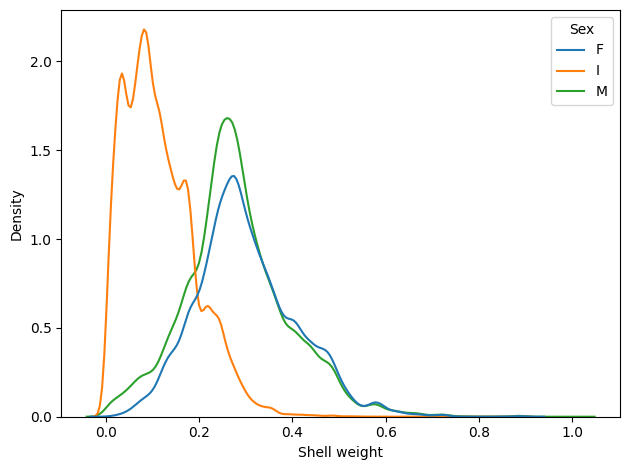

In [14]:
for col in numerical_cols:
    sns.kdeplot(data = df, x = col, hue = 'Sex')
    plt.tight_layout()
    plt.show()

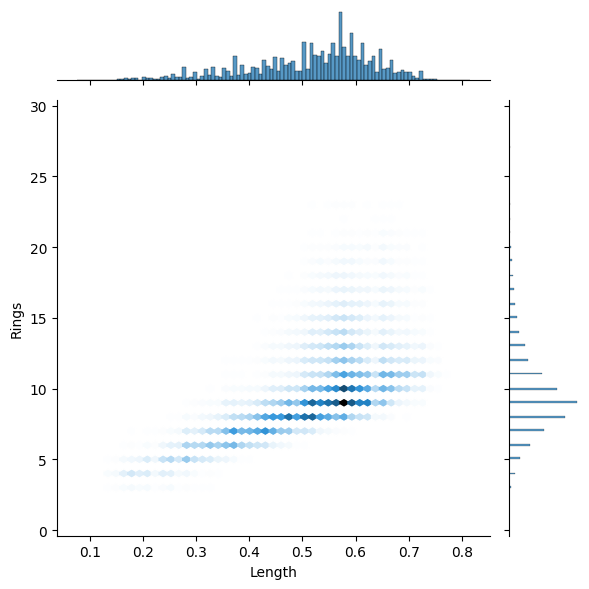

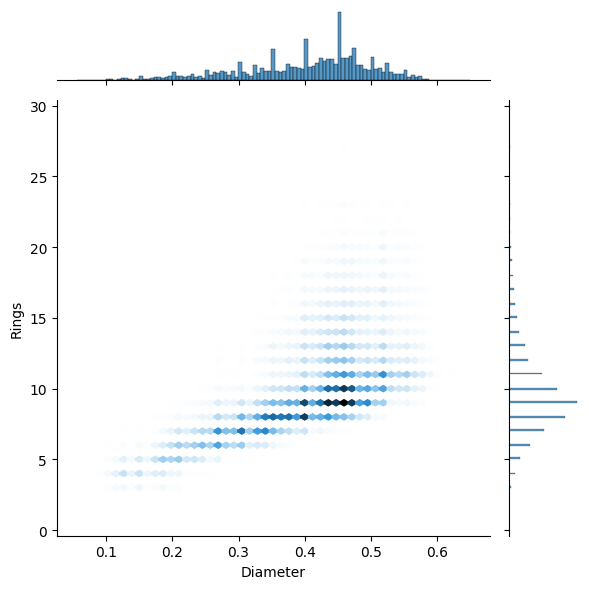

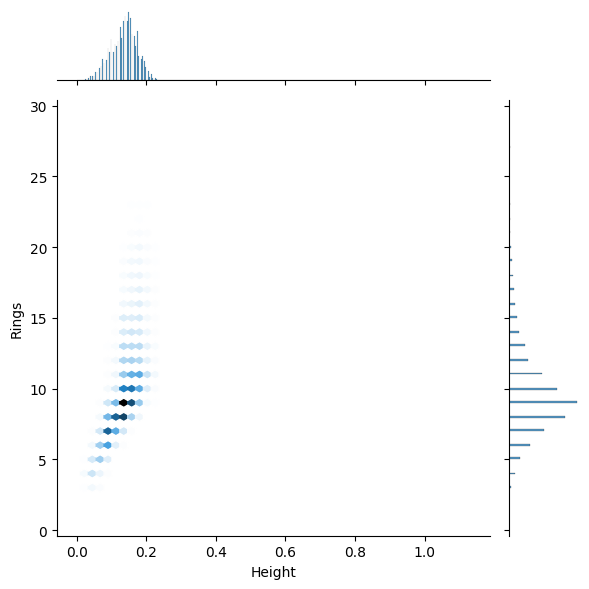

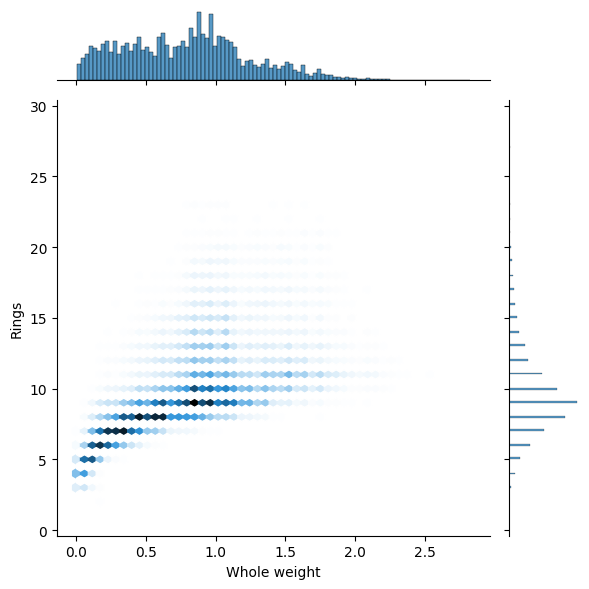

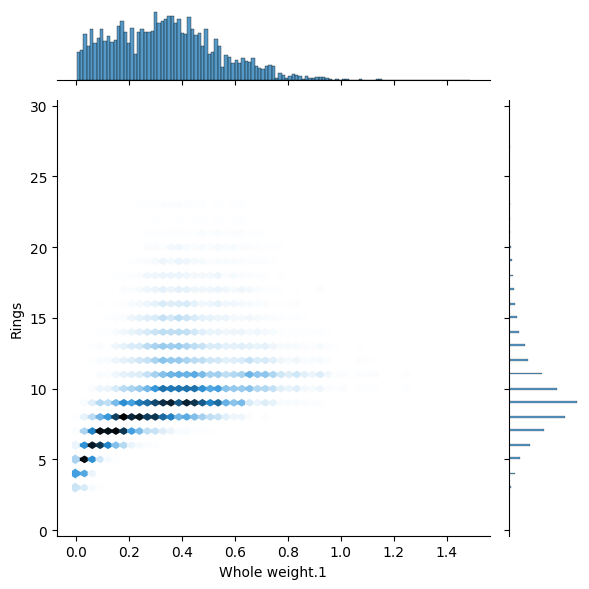

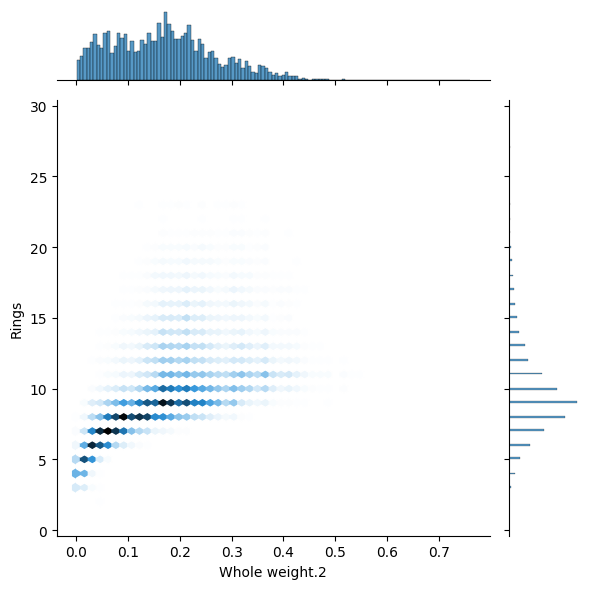

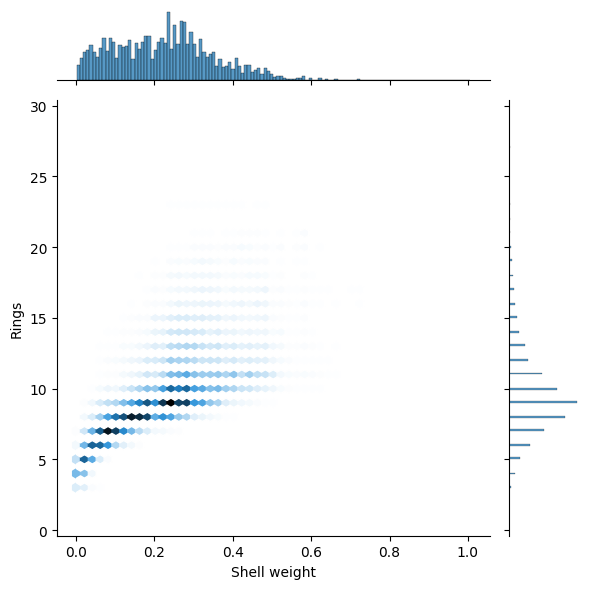

In [15]:
for col in numerical_cols:
    sns.jointplot(data = df, x = col, y = 'Rings', kind = 'hex')
    plt.tight_layout()
    plt.show()

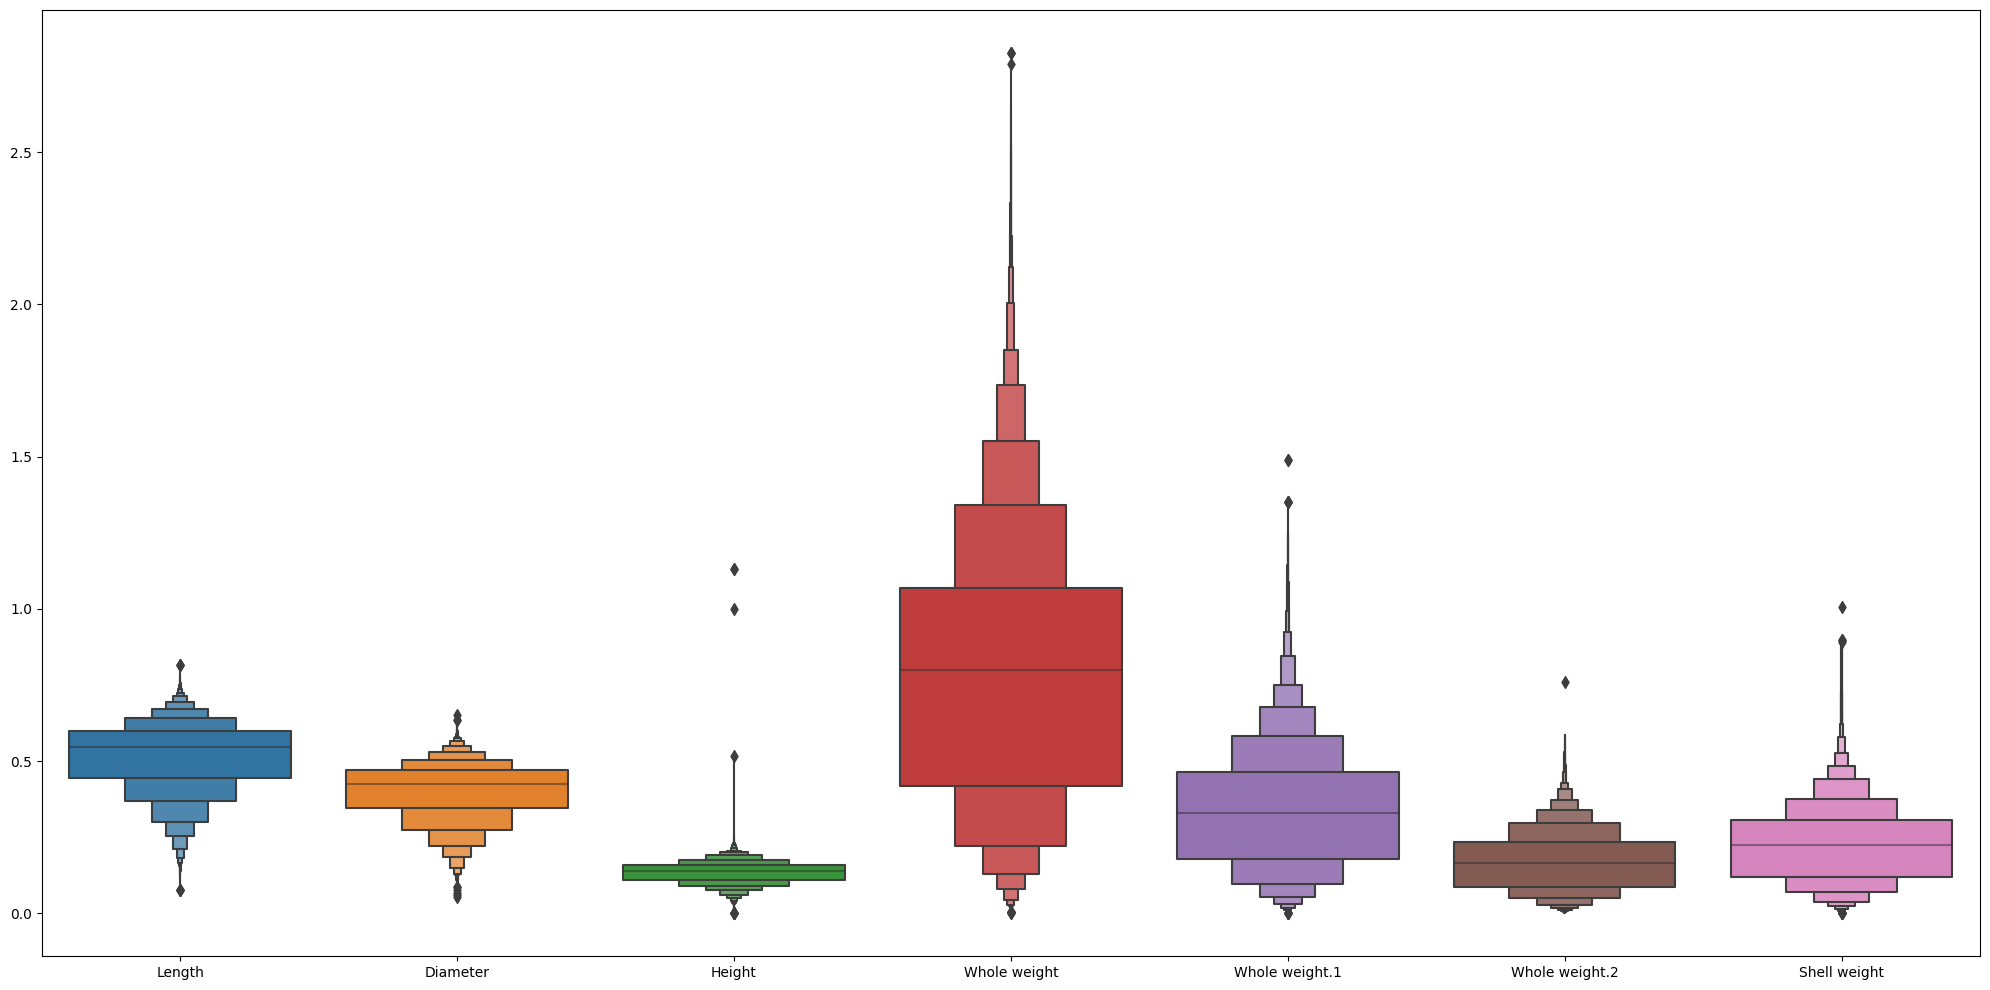

In [16]:
# boxplot of all columns 
plt.figure(figsize=(20, 10))
sns.boxenplot(data = df.drop(columns='Rings'))
plt.tight_layout()
plt.show()

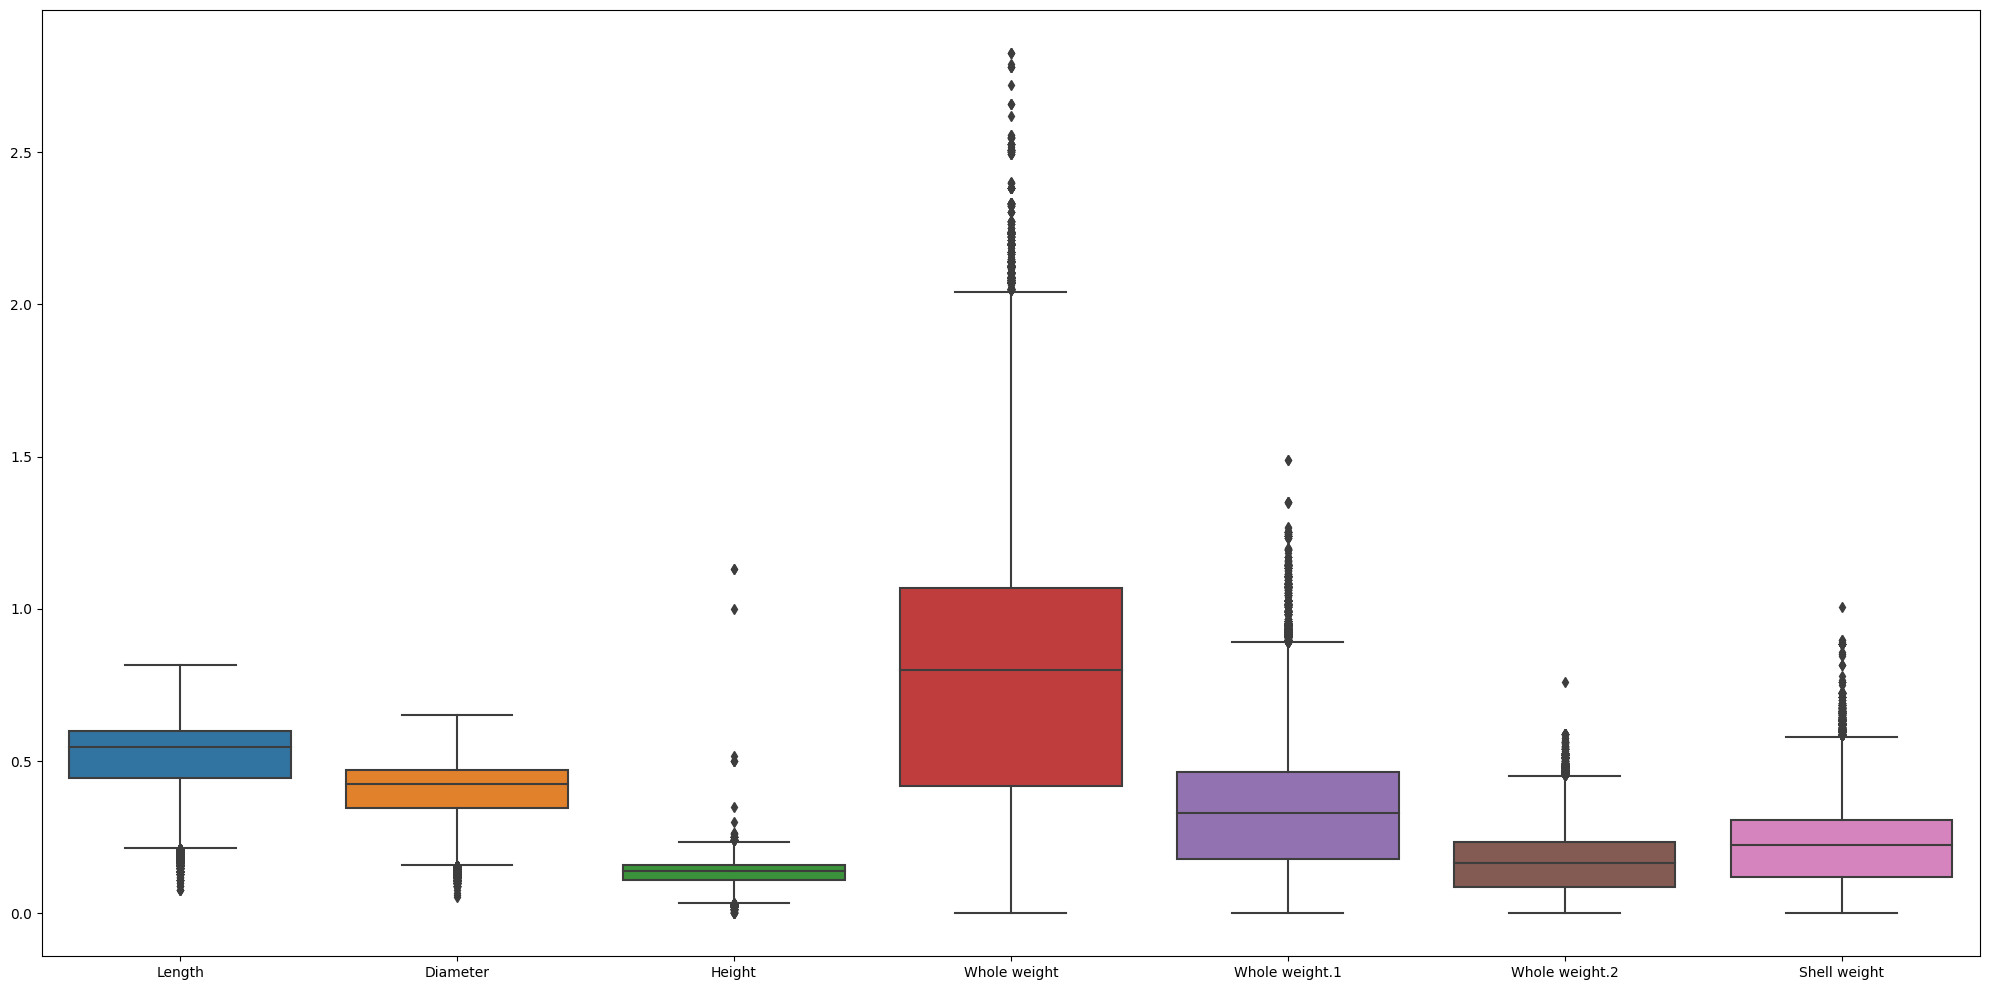

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df.drop(columns='Rings'))
plt.tight_layout()
plt.show()

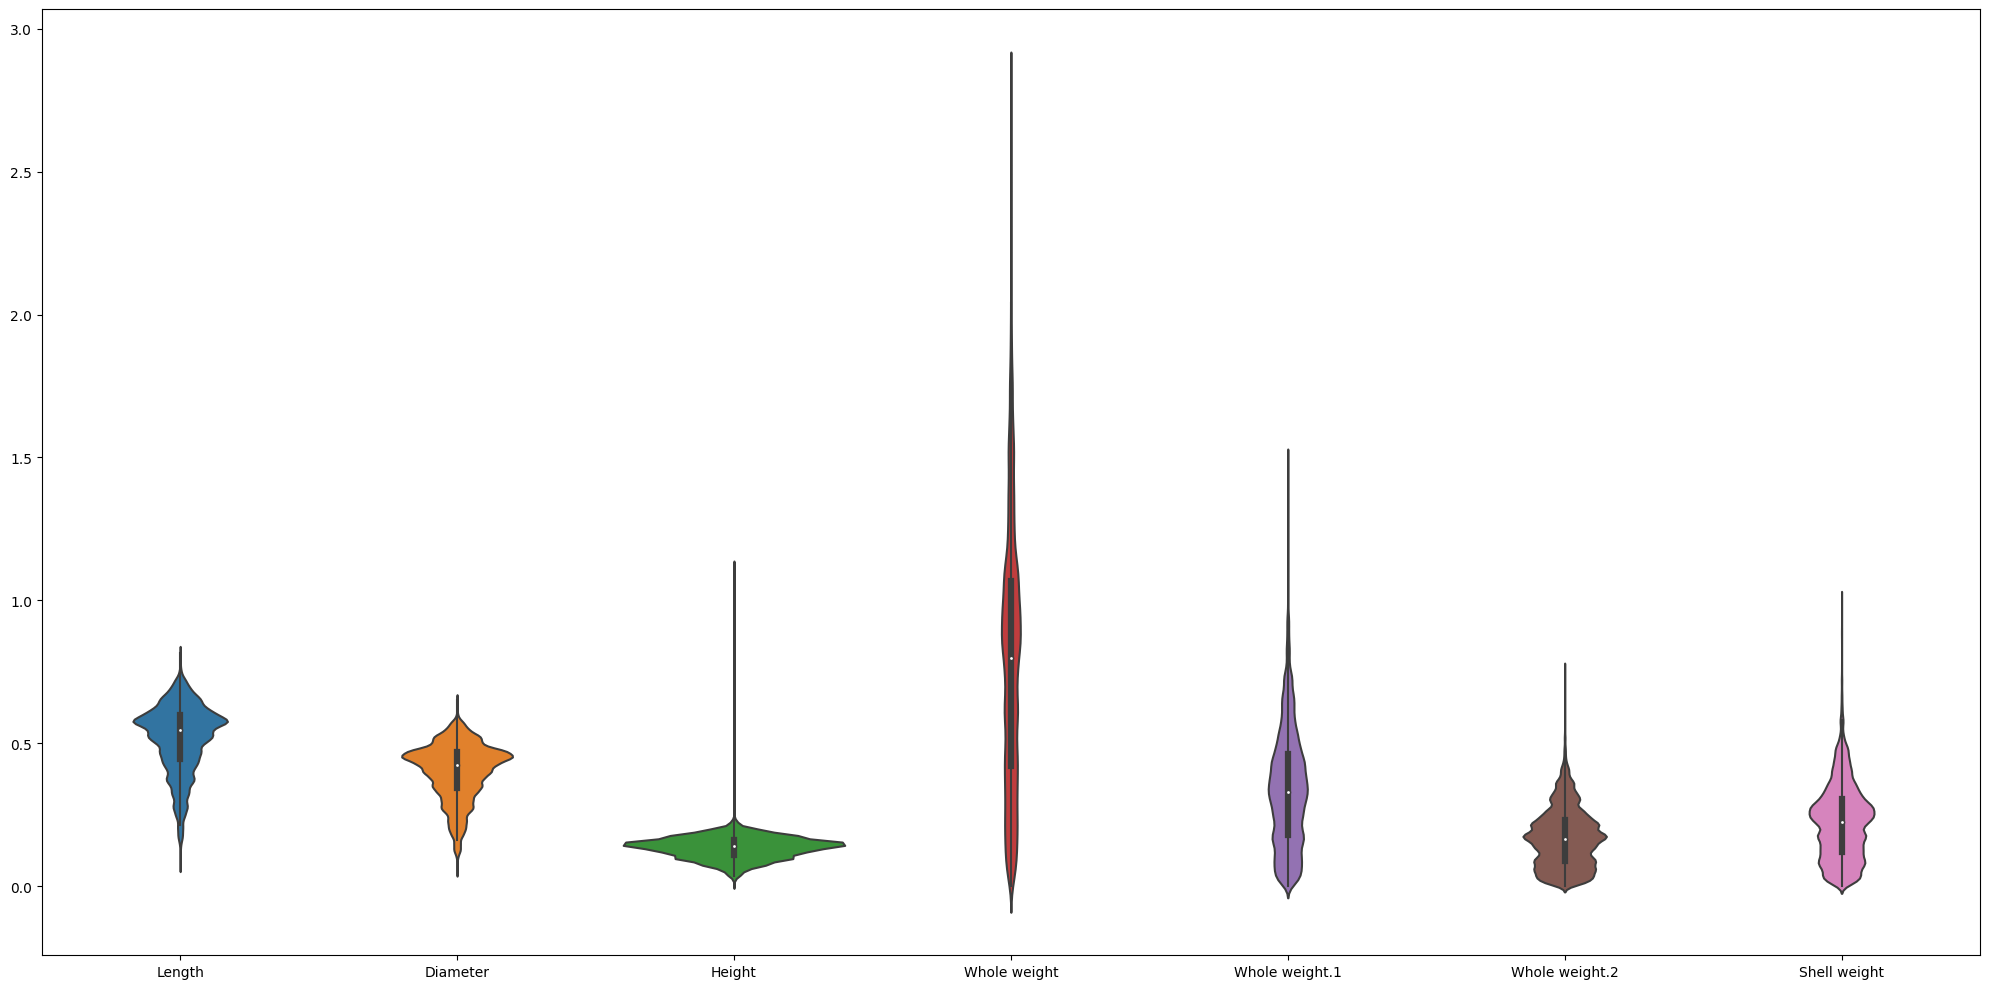

In [18]:
plt.figure(figsize=(20, 10))
sns.violinplot(data = df.drop(columns='Rings'))
plt.tight_layout()
plt.show()

# Preprocessing

In [19]:
df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


In [20]:
# Onehot encode Sex column
dummy1 = pd.get_dummies(df['Sex'], drop_first = True)
df = pd.concat([dummy1, df.drop(columns = ['Sex'])], axis = 1)

In [55]:
# apply log transformation to the target variable as RMSLE cannot be calculated for categorical variables
#y = df['Rings']
y = np.log(1+y)
X = df.iloc[:,:-1]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size= 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63430, 9), (27185, 9), (63430,), (27185,))

In [23]:
# perform scaling on X
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

In [24]:
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))


In [28]:
def evaluate_metrics(model, X_train, X_test, y_train, y_test, random_state = 42):
    
    #print('Started Training')
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_pred = rmsle(y_test = y_train, y_pred = y_pred_train)
    test_pred = rmsle(y_test = y_test, y_pred = y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    print(f'{model.__class__.__name__} -> Train RMSLE: {train_pred}, Test RMSLE: {test_pred}, R2 score: {r2}')
    
    return(train_pred, test_pred, np.round(r2,2))

def metrics2(evaluate_metrics, name):
    report = pd.DataFrame({'Train RMSLE' : evaluate_metrics[0],
                           'Test RMSLE' : evaluate_metrics[1],
                           'R2 Score' : evaluate_metrics[2]}, index = [name])
    return report

# merged the above 2 methods
def metrics(model, X_train, X_test, y_train, y_test, name):
    
    y_train = np.log(1+y_train)
    y_test = np.log(1+y_test)
    
    #print('Started Training')
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_pred = rmsle(y_test = y_train, y_pred = y_pred_train)
    test_pred = rmsle(y_test = y_test, y_pred = y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    report = pd.DataFrame({'Train RMSLE' : train_pred,
                           'Test RMSLE' : test_pred,
                           'R2 Score' : r2}, index = [name])
    return report

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

params = {'verbose': -1}

lr = LinearRegression()
ridge = Ridge()
xgb = XGBRegressor()
lgb = LGBMRegressor(**params)
rf = RandomForestRegressor()
cat = CatBoostRegressor(verbose=False)
svr = SVR()
knr = KNeighborsRegressor()

In [29]:
LR = metrics(lr,X_train, X_test, y_train, y_test, 'Linear')
Ridge = metrics(ridge,X_train, X_test, y_train, y_test, 'Ridge')
XGB = metrics(xgb,X_train, X_test, y_train, y_test, 'XGB')
LGB = metrics(lgb,X_train, X_test, y_train, y_test, 'LGB')
RF = metrics(rf,X_train, X_test, y_train, y_test, 'RF')
CAT = metrics(cat,X_train, X_test, y_train, y_test, 'CatBoost')

report_df = pd.concat([LR, Ridge, XGB, LGB, RF, CAT], axis=0)
report_df

,Train RMSLE,Test RMSLE,R2 Score
Linear,0.049070,0.049598,0.667096
Ridge,0.049070,0.049598,0.667095
XGB,0.040601,0.045738,0.719910
LGB,0.043566,0.045529,0.722260
RF,0.017438,0.046480,0.711432
CatBoost,0.042163,0.045291,0.725697


##### We can observe that the 3 boosting (XGB, LGB, CAT) algorithms have the best results

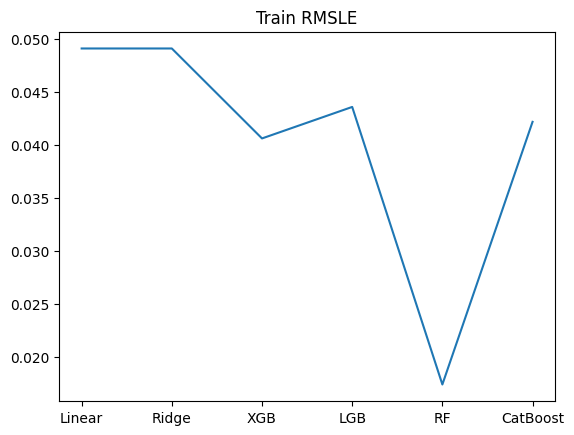

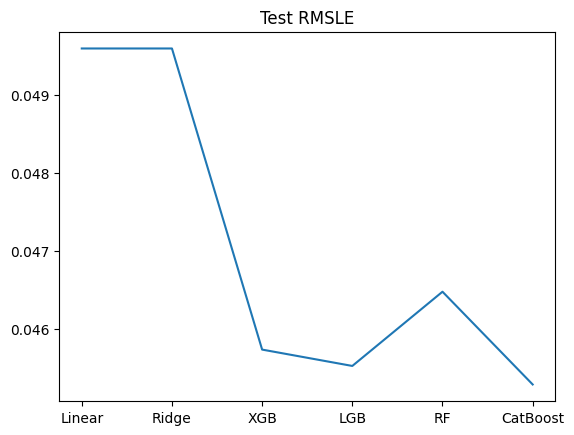

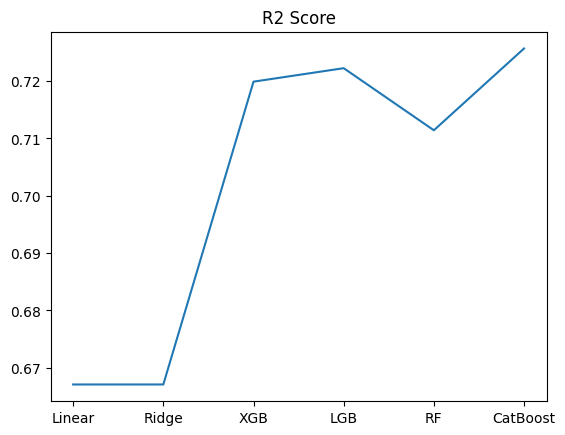

In [30]:
for col in report_df.columns:
    plt.plot(report_df[col])
    plt.title(col)
    plt.show()

In [60]:
import optuna
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:,:-1]
y = df['Rings']
y = np.log(1+y)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.3)


In [50]:
# Hyperparameter Tuning (Optuna) - Catboost

def objective(trial):
    catboost_params = {'iterations': trial.suggest_int('iterations', 1000, 3000),
                       'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
                       'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                       'depth': trial.suggest_int('depth', 1, 10),
                       'border_count': trial.suggest_int('border_count', 200, 255),
                       'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 100),
                       'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
                       'task_type': 'CPU',
                       'random_seed': 42,
                       'loss_function':'RMSE'
                       }
    
    cat = CatBoostRegressor(**catboost_params, verbose=0)
    
    cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)
    
    scores = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        cat.fit(X_train, y_train)
        
        y_pred = cat.predict(X_test)
        
        score = np.sqrt(mean_squared_error(y_test, y_pred))
        
        scores.append(score)
        
    return np.mean(scores)

In [33]:
'''study_cat = optuna.create_study(direction='minimize',study_name='optuna_catboost')
study_cat.optimize(objective, n_trials=25, show_progress_bar=True)

best_params_cat = study_cat.best_params
best_params_cat'''

"study_cat = optuna.create_study(direction='minimize',study_name='optuna_catboost')\nstudy_cat.optimize(objective, n_trials=25, show_progress_bar=True)\n\nbest_params_cat = study_cat.best_params\nbest_params_cat"

In [61]:
best_params_cat = {'iterations': 2150,
                   'learning_rate': 0.03141180338005131,
                   'subsample': 0.540401437064242,
                   'depth': 8,
                   'border_count': 255,
                   'l2_leaf_reg': 3.4242381422249655,
                   'colsample_bylevel': 0.9837015020231156}

cat = CatBoostRegressor(**best_params_cat, verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print(y_pred)
y_pred1 = np.expm1(y_pred)
print(y_pred1)

[2.25593849 2.12698982 2.35392167 ... 2.15013779 2.35647582 2.22942988]
[8.54424628 7.38957467 9.52677136 ... 7.58604137 9.55369276 8.29456558]


##### Preprocess test set

In [62]:
def test_df_preprocessor(df):
    dummy1 = pd.get_dummies(df['Sex'], drop_first = True)
    df = pd.concat([dummy1, df.drop(columns = ['Sex','id'])], axis = 1)
    scaled = sc.transform(df)
    return pd.DataFrame(scaled, columns = df.columns)

test_df_preprocessor(df_test)

,I,M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,-0.754373,1.382185,1.081730,0.747486,0.508660,0.981279,1.358779,1.419701,0.572435
1,-0.754373,1.382185,0.530849,0.594159,0.639710,0.423046,0.672770,0.496029,0.376199
2,-0.754373,1.382185,0.361348,0.185287,0.115510,0.108904,0.055362,0.148410,0.110703
3,-0.754373,1.382185,0.446099,0.900813,0.246560,0.184429,0.055362,0.168274,0.068378
4,1.325604,-0.723492,-0.867539,-0.785784,-0.670789,-0.945171,-0.900150,-1.018595,-0.932041
...,...,...,...,...,...,...,...,...,...
60406,1.325604,-0.723492,-1.460795,-1.450201,-1.326039,-1.340312,-1.311756,-1.420839,-1.355295
60407,-0.754373,-0.723492,0.064720,0.083069,0.246560,0.119849,0.231764,-0.025399,-0.162488
60408,1.325604,-0.723492,0.615600,0.389723,0.508660,0.727338,0.253814,0.302355,0.299244
60409,-0.754373,-0.723492,1.208856,1.258576,1.426009,1.540606,1.211777,1.866639,1.607483


In [ ]:
'''preds = cat.predict(test_df_preprocessor(df_test))
preds = np.expm1(preds)
preds'''

array([ 9.77033124,  9.67903622,  9.88821115, ..., 12.11844213,
       13.3430261 ,  8.37394594])

##### Submission

In [ ]:
'''submission = pd.DataFrame({'id' : df_test['id'], 'Rings' : preds})
submission.to_csv('catoptuna.csv', index = False)'''

##### LGBR Optuna

In [41]:
def objective(trial):
    
    lgbr_params = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 10.0),
    }
    
    cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
    scores = []
    
    for _, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        lgbr = LGBMRegressor(**lgbr_params, verbose = -1)
        
        lgbr.fit(X_train, y_train)
        
        y_pred = lgbr.predict(X_test)
        
        score = np.sqrt(mean_squared_error(y_test, y_pred))
        
        scores.append(score)
        
    return np.mean(scores)

In [ ]:
#study = optuna.create_study(direction = 'minimize')
#study.optimize(objective, n_trials = 15)
#study.best_params

{'n_estimators': 1829,
 'learning_rate': 0.024184221096877803,
 'max_depth': 8,
 'subsample': 0.9617260076159756,
 'colsample_bytree': 0.5175043950925265,
 'min_child_weight': 0.03531179328151949}

In [63]:
best_params_lgb = {'n_estimators': 1829,
 'learning_rate': 0.024184221096877803,
 'max_depth': 8,
 'subsample': 0.9617260076159756,
 'colsample_bytree': 0.5175043950925265,
 'min_child_weight': 0.03531179328151949}

lgb = LGBMRegressor(**best_params_lgb, verbose = -1)
lgb.fit(X_train, y_train)
preds2 = lgb.predict(test_df_preprocessor(df_test))
print(preds2)
preds2 = np.expm1(preds2)
print(preds2)

[2.48102001 2.36542538 2.26480008 ... 2.4756855  2.6150284  1.66908825]
[10.95345078  9.64856754  8.62919936 ... 10.88985487 12.66760449
  4.30732663]


##### submission for lgbR

In [64]:
'''submission = pd.DataFrame({'id' : df_test['id'], 'Rings' : preds2})
submission.to_csv('lgboptuna.csv', index = False)'''

"submission = pd.DataFrame({'id' : df_test['id'], 'Rings' : preds2})\nsubmission.to_csv('lgboptuna.csv', index = False)"

#### XGB Optuna

In [45]:
def objective(trial):
    
    xgb_params = {
        "n_estimators": trial.suggest_int('n_estimators', 1000, 3000),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20)
    }
    
    scores = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    xgb = XGBRegressor(**xgb_params)
    
    for _,(train_index, test_index) in enumerate(cv.split(X,y)):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        
        score = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append(score)
        
    return np.mean(scores)

In [ ]:
'''study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 20, show_progress_bar = True)'''

[I 2024-04-15 23:24:57,111] A new study created in memory with name: no-name-344c365a-b2a2-4d43-92db-b136675888d7


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2024-04-15 23:25:34,930] Trial 0 finished with value: 2.0019990356964628 and parameters: {'n_estimators': 1436, 'learning_rate': 0.003597207890540881, 'max_depth': 2, 'subsample': 0.6100860839123052, 'colsample_bytree': 0.9881021428376022, 'min_child_weight': 2}. Best is trial 0 with value: 2.0019990356964628.
[I 2024-04-15 23:26:29,934] Trial 1 finished with value: 1.8499434881877668 and parameters: {'n_estimators': 1475, 'learning_rate': 0.05728524040195473, 'max_depth': 6, 'subsample': 0.2641332988102806, 'colsample_bytree': 0.38213532602737926, 'min_child_weight': 20}. Best is trial 1 with value: 1.8499434881877668.
[I 2024-04-15 23:27:49,113] Trial 2 finished with value: 1.8431839948785782 and parameters: {'n_estimators': 1618, 'learning_rate': 0.0031789746884048546, 'max_depth': 7, 'subsample': 0.6640811791084564, 'colsample_bytree': 0.6358956664451206, 'min_child_weight': 7}. Best is trial 2 with value: 1.8431839948785782.
[I 2024-04-15 23:28:32,837] Trial 3 finished with val

In [66]:
XGB_best_params = {'n_estimators': 1056,
 'learning_rate': 0.008423523509622126,
 'max_depth': 10,
 'subsample': 0.1654604495857046,
 'colsample_bytree': 0.4709729526428762,
 'min_child_weight': 13}

xgb = XGBRegressor(**XGB_best_params, verbose = 0)
xgb.fit(X_train, y_train)
preds4 = xgb.predict(test_df_preprocessor(df_test))
print(preds4)
preds4 = np.expm1(preds4)
print(preds4)

[2.5190911 2.4987788 2.2321835 ... 2.6240487 2.6100585 1.631894 ]
[11.417306  11.167626   8.320194  ... 12.791449  12.599847   4.1135507]


In [ ]:
'''submission = pd.DataFrame({'id' : df_test['id'], 'Rings' : preds3})
submission.to_csv('xgboptuna.csv', index = False)'''